In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
m = pd.read_csv("../../data/processed/KOBIS_개봉일람_2.csv")

m

,영화명,감독,제작사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
0,명량,김한민,(주)빅스톤픽쳐스,2014-07-30,장편,한국,1587,1.357484e+11,17613682,3.312123e+10,4163666,사극,15세이상관람가,일반영화
1,극한직업,이병헌,(주)어바웃잇영화사 해그림 주식회사(주)씨제이이엔엠,2019-01-23,장편,한국,1978,1.396480e+11,16264944,3.185866e+10,3638287,코미디,15세이상관람가,일반영화
2,신과함께-죄와 벌,김용화,리얼라이즈픽쳐스(주)(주)덱스터스튜디오,2017-12-20,장편,한국,1912,1.156987e+11,14410754,2.753083e+10,3346172,판타지,12세이상관람가,일반영화
3,국제시장,윤제균,(주)제이케이필름(주)씨제이이엔엠,2014-12-17,장편,한국,966,1.108280e+11,14245998,2.584252e+10,3233946,드라마,12세이상관람가,일반영화
4,어벤져스: 엔드게임,안소니 루소조 루소,마블 스튜디오,2019-04-24,장편,미국,2835,1.221827e+11,13934592,3.357714e+10,3597963,액션,12세이상관람가,일반영화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,늑대와 빨간 재킷,뱅상 파로노,NaN,2021-02-03,장편,프랑스,74,8.525200e+06,950,2.893740e+06,345,스릴러,청소년관람불가,독립/예술영화
3971,마라가 큰 결정을 해야 해,로버트 루케틱,NaN,2021-01-07,장편,미국,79,7.475940e+06,856,2.830800e+06,321,멜로/로맨스,15세이상관람가,일반영화
3972,락다운 213주,아담 메이슨,플래티넘 듄스,2022-08-31,장편,미국,61,7.664799e+06,845,3.573900e+06,381,스릴러,15세이상관람가,일반영화
3973,래미의 드래곤월드 구출작전,웨이밍 황,NaN,2020-07-16,장편,중국,65,6.067340e+06,779,6.345000e+05,74,애니메이션,전체관람가,일반영화


In [3]:
m.isna().sum()

영화명           0
감독            3
제작사        1643
개봉일           0
영화형태          0
국적            0
전국 스크린수       0
전국 매출액        0
전국 관객수        0
서울 매출액        0
서울 관객수        0
장르            0
등급            0
영화구분          0
dtype: int64

In [4]:
# 감독, 제작사 결측치 제거
m = m.dropna(subset=["감독", "제작사"])

m

,영화명,감독,제작사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
0,명량,김한민,(주)빅스톤픽쳐스,2014-07-30,장편,한국,1587,1.357484e+11,17613682,3.312123e+10,4163666,사극,15세이상관람가,일반영화
1,극한직업,이병헌,(주)어바웃잇영화사 해그림 주식회사(주)씨제이이엔엠,2019-01-23,장편,한국,1978,1.396480e+11,16264944,3.185866e+10,3638287,코미디,15세이상관람가,일반영화
2,신과함께-죄와 벌,김용화,리얼라이즈픽쳐스(주)(주)덱스터스튜디오,2017-12-20,장편,한국,1912,1.156987e+11,14410754,2.753083e+10,3346172,판타지,12세이상관람가,일반영화
3,국제시장,윤제균,(주)제이케이필름(주)씨제이이엔엠,2014-12-17,장편,한국,966,1.108280e+11,14245998,2.584252e+10,3233946,드라마,12세이상관람가,일반영화
4,어벤져스: 엔드게임,안소니 루소조 루소,마블 스튜디오,2019-04-24,장편,미국,2835,1.221827e+11,13934592,3.357714e+10,3597963,액션,12세이상관람가,일반영화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,코드 8,제프 챈,XYZ 필름스,2020-07-02,장편,기타,82,1.124136e+07,1362,3.337960e+06,400,SF,15세이상관람가,일반영화
3959,레이징 파이어,진목승,텐센트 픽처스,2022-01-20,장편,홍콩,60,1.216316e+07,1346,5.719560e+06,605,액션,15세이상관람가,독립/예술영화
3963,섀도우 클라우드,로젠느 리앙,버티컬 엔터테인먼트,2021-04-22,장편,미국,71,1.151214e+07,1282,3.775040e+06,384,SF,15세이상관람가,일반영화
3965,그녀의 비밀정원,김인식,(주)인디컴미디어,2020-04-22,장편,한국,79,9.966880e+06,1254,2.905860e+06,375,드라마,15세이상관람가,독립/예술영화


In [5]:
# 감독별 전국 관객수 로그 변환 평균값 계산
director_groupby = m.groupby('감독')['전국 관객수'].apply(lambda x: np.log1p(x).mean())
# 제작사별 전국 관객수 로그 변환 평균값 계산
producer_groupby = m.groupby('제작사')['전국 관객수'].apply(lambda x: np.log1p(x).mean())

# 각 값을 변환
m['감독'] = m['감독'].map(director_groupby)
m['제작사'] = m['제작사'].map(producer_groupby)

m

C:\Users\lbw\AppData\Local\Temp\ipykernel_20732\3277281122.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m['감독'] = m['감독'].map(director_groupby)
C:\Users\lbw\AppData\Local\Temp\ipykernel_20732\3277281122.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m['제작사'] = m['제작사'].map(producer_groupby)


,영화명,감독,제작사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
0,명량,14.306190,12.886638,2014-07-30,장편,한국,1587,1.357484e+11,17613682,3.312123e+10,4163666,사극,15세이상관람가,일반영화
1,극한직업,15.172542,16.604523,2019-01-23,장편,한국,1978,1.396480e+11,16264944,3.185866e+10,3638287,코미디,15세이상관람가,일반영화
2,신과함께-죄와 벌,15.714698,16.402393,2017-12-20,장편,한국,1912,1.156987e+11,14410754,2.753083e+10,3346172,판타지,12세이상관람가,일반영화
3,국제시장,15.908342,15.263750,2014-12-17,장편,한국,966,1.108280e+11,14245998,2.584252e+10,3233946,드라마,12세이상관람가,일반영화
4,어벤져스: 엔드게임,14.740589,15.240150,2019-04-24,장편,미국,2835,1.221827e+11,13934592,3.357714e+10,3597963,액션,12세이상관람가,일반영화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,코드 8,7.217443,7.217443,2020-07-02,장편,기타,82,1.124136e+07,1362,3.337960e+06,400,SF,15세이상관람가,일반영화
3959,레이징 파이어,7.205635,7.205635,2022-01-20,장편,홍콩,60,1.216316e+07,1346,5.719560e+06,605,액션,15세이상관람가,독립/예술영화
3963,섀도우 클라우드,7.156956,8.649415,2021-04-22,장편,미국,71,1.151214e+07,1282,3.775040e+06,384,SF,15세이상관람가,일반영화
3965,그녀의 비밀정원,7.770353,7.134891,2020-04-22,장편,한국,79,9.966880e+06,1254,2.905860e+06,375,드라마,15세이상관람가,독립/예술영화


In [6]:
m[["전국 관객수"]].to_csv("../../data/processed/KOBIS_개봉일람_4.csv", index=False)

In [7]:
# 개봉일에서 개봉월만 추출
m["개봉월"] = m["개봉일"].apply(lambda x: x.split("-")[1])

# 영화명, 개봉일 컬럼 삭제
m = m.drop(["영화명", "개봉일", "전국 매출액", "전국 관객수", "서울 매출액", "서울 관객수"], axis=1)

m

C:\Users\lbw\AppData\Local\Temp\ipykernel_20732\2537591714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m["개봉월"] = m["개봉일"].apply(lambda x: x.split("-")[1])


,감독,제작사,영화형태,국적,전국 스크린수,장르,등급,영화구분,개봉월
0,14.306190,12.886638,장편,한국,1587,사극,15세이상관람가,일반영화,07
1,15.172542,16.604523,장편,한국,1978,코미디,15세이상관람가,일반영화,01
2,15.714698,16.402393,장편,한국,1912,판타지,12세이상관람가,일반영화,12
3,15.908342,15.263750,장편,한국,966,드라마,12세이상관람가,일반영화,12
4,14.740589,15.240150,장편,미국,2835,액션,12세이상관람가,일반영화,04
...,...,...,...,...,...,...,...,...,...
3956,7.217443,7.217443,장편,기타,82,SF,15세이상관람가,일반영화,07
3959,7.205635,7.205635,장편,홍콩,60,액션,15세이상관람가,독립/예술영화,01
3963,7.156956,8.649415,장편,미국,71,SF,15세이상관람가,일반영화,04
3965,7.770353,7.134891,장편,한국,79,드라마,15세이상관람가,독립/예술영화,04


In [8]:
# 영화형태, 국적, 장르, 등급, 영화구분 열을 더미 변수로 변환
dummy_columns = ["영화형태", "국적", "장르", "등급", "영화구분"]
m_dummy = pd.get_dummies(m[dummy_columns], prefix=dummy_columns)

# 더미 변수를 새로운 데이터프레임에 추가
m_new = pd.concat([m, m_dummy], axis=1)

# 기존의 영화형태, 국적, 장르, 등급, 영화구분 열 삭제
m_new.drop(dummy_columns, axis=1, inplace=True)

# 결과 확인
m_new

,감독,제작사,전국 스크린수,개봉월,영화형태_단편,영화형태_옴니버스,영화형태_장편,국적_기타,국적_독일,국적_러시아,...,장르_어드벤처,장르_전쟁,장르_코미디,장르_판타지,등급_12세이상관람가,등급_15세이상관람가,등급_전체관람가,등급_청소년관람불가,영화구분_독립/예술영화,영화구분_일반영화
0,14.306190,12.886638,1587,07,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,15.172542,16.604523,1978,01,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,15.714698,16.402393,1912,12,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,True
3,15.908342,15.263750,966,12,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,14.740589,15.240150,2835,04,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,7.217443,7.217443,82,07,False,False,True,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3959,7.205635,7.205635,60,01,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
3963,7.156956,8.649415,71,04,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3965,7.770353,7.134891,79,04,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [9]:
# 설명할 수 있는 분산의 비율이 90% 이상이 되는 주성분을 추출하도록 PCA 모델을 학습
pca = PCA(n_components=0.7)
pca.fit(m_new)

# 주성분 점수 추출
PC_scores = pca.transform(m_new)

In [10]:
# PCA의 설명된 분산 비율과 목표 분산 비율을 비교하여 유지할 주성분 수를 결정하는 함수
# var_ratio : 주성분(PC)별로 설명되는 분산의 비율을 나타내는 리스트
# goal_var : 유지하고자 하는 분산의 비율 목표값
# total_variance : 목표값까지의 분산이 누적되는 변수
# n_components : 유지해야 할 주성분 수를 담는 변수
# explained_variance : 주성분 하나당 설명되는 분산 비율을 담는 변수

def select_n_components(var_ratio, goal_var: float) -> int:
    total_variance = 0.0
    n_components = 0
    
    # 주성분(PC)별로 설명되는 분산의 비율을 순회하면서, 목표 분산 비율에 도달하는지 확인
    for explained_variance in var_ratio:
        total_variance += explained_variance
        n_components += 1
        
        # 누적 분산이 목표 분산에 도달하면 더 이상 주성분을 추가하지 않고 루프 종료
        if total_variance >= goal_var:
            break
    
    return n_components

# 위에서 계산한 주성분 분산 비율을 바탕으로 몇 개의 주성분을 선택할지 결정
n_components = select_n_components(pca.explained_variance_ratio_, 0.7)
print(n_components)

1


In [11]:
# DataFrame으로 변환
PC_m = pd.DataFrame(data=PC_scores, columns=[f"PC{i}" for i in range(n_components)])

PC_m

,PC0
0,1131.984921
1,1522.993318
2,1456.997652
3,511.003173
4,2379.981547
...,...
2324,-373.039293
2325,-395.041205
2326,-384.035811
2327,-376.039459


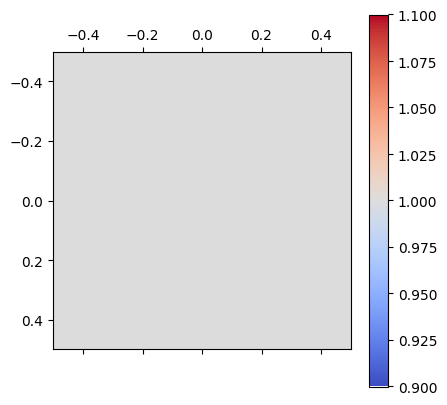

In [12]:
corr_matrix = PC_m.corr()
plt.matshow(corr_matrix, cmap="coolwarm")
plt.colorbar()
plt.show()

In [13]:
m.to_csv("../../data/processed/KOBIS_개봉일람_3.csv", index=False)